### The force applied by the eddy current

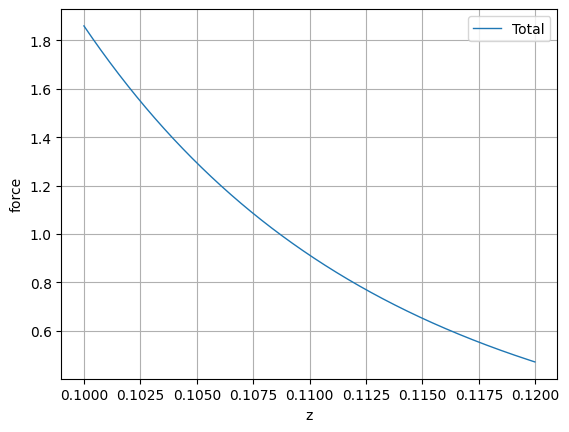

In [151]:
from numpy import *
import matplotlib.pyplot as plt
from kit.functions import F

#save path
path = '/Users/gansz/Downloads/CUPT2024/PythonAnalysis/plots/forceByEddyCurrent_F1-4.png'

h = [0.0] * 1000

for i in range(1000):
    h[i] = i / 50000 + 0.1


F_arr = [0.0] * 1000

for i in range(1000):
    F_arr[i] = F(h[i])

x = np.array(h)
y = np.array(F_arr)


plt.plot(x,y, lw='1', label='Total')
plt.legend()

plt.grid()
plt.xlabel('z')
plt.ylabel('force')

plt.savefig(path, dpi=320)
plt.show()

plt.close()




0, 0.0315
1, 0.0315
2, 0.031499902113
3, 0.031499745826640384
4, 0.0314995547007066
5, 0.03149934279268769
6, 0.031499118490478976
7, 0.031498886798994916
8, 0.03149865070452911
9, 0.03149841198887274
10, 0.03149817171510912
11, 0.031497930517491425
12, 0.03149768877441161
13, 0.03149744671160755
14, 0.031497204463742684
15, 0.03149696211114686
16, 0.031496719701736606
17, 0.03149647726409265
18, 0.03149623481526164
19, 0.031495992365410196
20, 0.03149574992060125
21, 0.0314955074844501
22, 0.031495265059112196
23, 0.031495022645872374
24, 0.031494780245496234
25, 0.031494537858439725
26, 0.03149429548497416
27, 0.03149405312526073
28, 0.031493810779395
29, 0.03149356844743335
30, 0.03149332612940884
31, 0.03149308382534062
32, 0.031492841535239534
33, 0.03149259925911148
34, 0.0314923569969594
35, 0.0314921147487845
36, 0.03149187251458691
37, 0.03149163029436616
38, 0.0314913880881214
39, 0.03149114589585156
40, 0.031490903717555425
41, 0.03149066155323172
42, 0.03149041940287911
43,

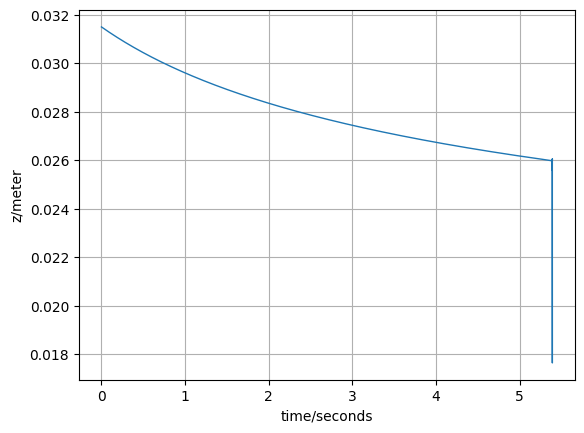

In [166]:
import numpy as np
import matplotlib.pyplot as plt
from kit.Constants import *
from kit.functions import F


#开始迭代计算，不包含下方磁铁的作用力

#Initializations
dt = 0.0001
t_max = 10
steps = int(t_max / dt)

z = [0.0] * steps
z1 = [0.0] * steps
z2 = [0.0] * steps


#Initial conditions
z[0] = H + h0

#Calculation
for i in range(steps - 1):
    if z[i] < H or z[i] > 1:
        steps = i
        print(f"final {i}, {z[i]}")
        break
    z2[i] = ((-1 * z1[i]) * F(z[i])) - g
    z1[i + 1] = z1[i] + z2[i] * dt
    z[i + 1] = z[i] + z1[i] * dt
    print(f"{i}, {z[i]}")


t = [0.0] * (steps)
for i in range(steps):
    t[i] = dt * (i + 1)
    
    
x = np.array(t)
y = np.array(z[0:steps:1])
# y = np.array(z)


plt.grid()
plt.xlabel('time/seconds')
plt.ylabel('z/meter')
plt.plot(x,y,lw='1')


